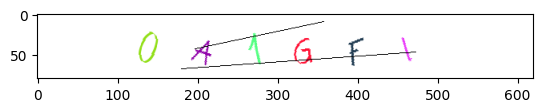

In [12]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def show(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

train_path = "../dataset/train/"
test_path = "../dataset/test/"
folder_path = "./test-cases/"
# sample_path = "pepper-noise-overlap.png"
# sample_path = "lines.png"
# sample_path = "font-white-space.png"
# sample_path = "overlap3.png"
sample_path = "0a1gfi-0.png"

img = cv2.imread(folder_path+sample_path)
show(img)


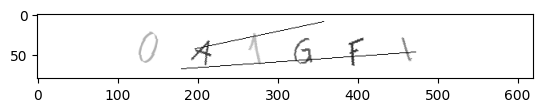

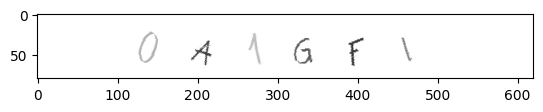

In [13]:
lower_black = np.array([0, 0, 0])
upper_black = np.array([50, 50, 50])  # Adjust as needed based on line intensity

mask = cv2.inRange(img, lower_black, upper_black)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
show(gray)

img_inpainted = cv2.inpaint(gray, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

# Display results
# show(img)
# show(mask)
show(img_inpainted)

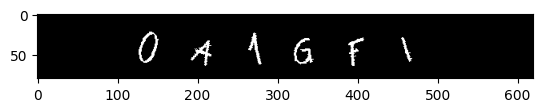

127 22 342 43


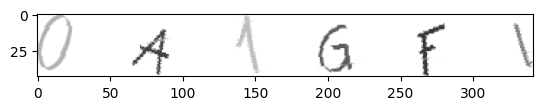

In [14]:
# Apply a binary threshold to create a mask
_, thresh = cv2.threshold(img_inpainted, 240, 255, cv2.THRESH_BINARY_INV)  # Invert to make object white and background black
show(thresh)
# Find the bounding box of the non-white areas
coords = cv2.findNonZero(thresh)
x, y, w, h = cv2.boundingRect(coords)
print(x, y, w, h)
# Crop the image using the bounding box coordinates
cropped_image = img_inpainted[y:y+h, x:x+w]
show(cropped_image)

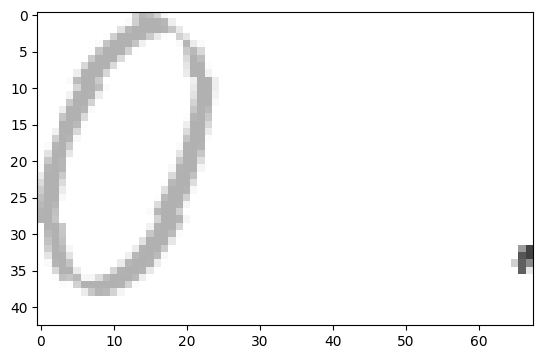

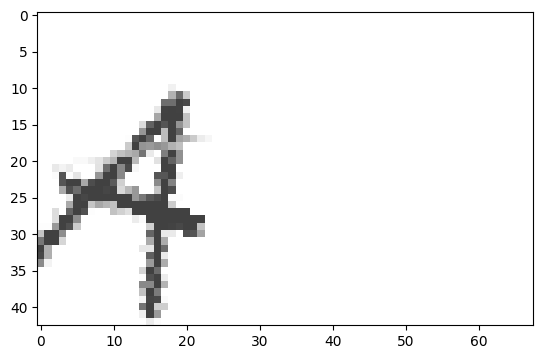

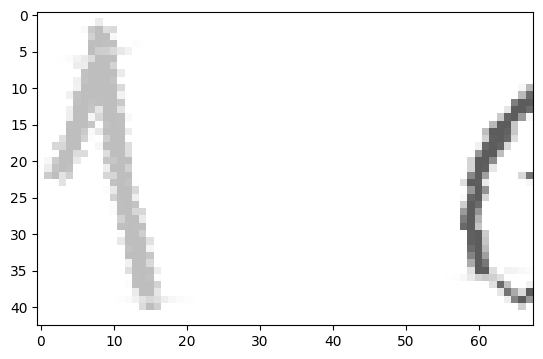

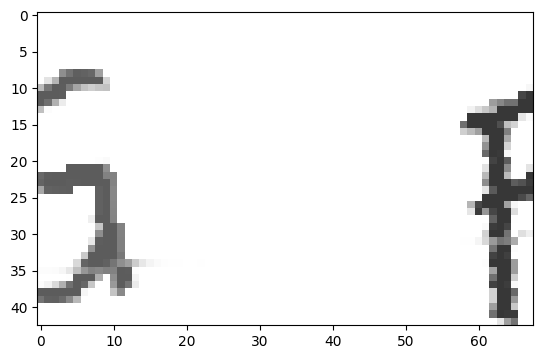

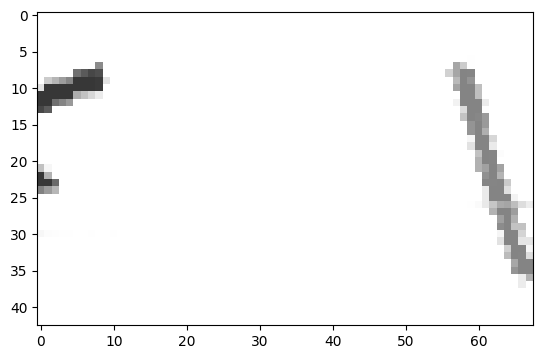

In [15]:
height, width = cropped_image.shape

# Define the number of portions you want
num_portions = 5  # For example, split into 4 equal portions along the width

# Calculate the width of each portion
portion_width = width // num_portions

# Split the image into the specified number of portions
for i in range(num_portions):
    # Calculate the x-coordinates for the current portion
    x_start = i * portion_width
    x_end = x_start + portion_width
    
    # Crop the portion
    portion = cropped_image[:, x_start:x_end]
    show(portion)
    
    # Save each portion as a separate image with a label
    # filename = f"portion_{i+1}.jpg"
    # cv2.imwrite(filename, portion)